In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid", color_codes=True)

pd.set_option('display.max_columns', None)

In [2]:
data=pd.read_csv('partial_clean_data.csv')

In [3]:
data.columns

Index(['Unnamed: 0', 'Salary', 'Gender', '10percentage', '12percentage',
       '12board', 'Degree', 'Specialization', 'collegeGPA', 'English',
       'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ComputerScience',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', '12GradAge', 'GradAge'],
      dtype='object')

In [4]:
num_males = data['Gender'].where(data['Gender'] == 'm').count()
num_females = data['Gender'].where(data['Gender'] == 'f').count()
print('Number of male candidates : {}'.format(num_males))
print('Number of female candidates : {}'.format(num_females))
print('Male to Female ratio: {:.2f}'.format(num_males/num_females))

Number of male candidates : 677
Number of female candidates : 219
Male to Female ratio: 3.09


This is a bar plot of the gender category 

m=Male f=Female

<AxesSubplot:>

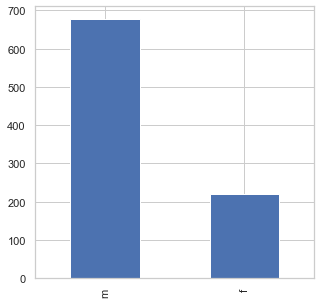

In [5]:
data['Gender'].value_counts().plot(kind='bar', figsize=(5,5))


Boxplot visualization of salary levels by gender

Median salary of males is slightly greater than that of females.

Higher outliers are observed in male category. Indicating that salaries above normal are earned more by males.

Text(0.5, 0.98, 'Salary levels by gender')

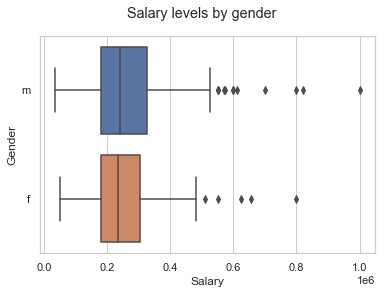

In [7]:
sns.boxplot(x='Salary', y = 'Gender', data=data)
plt.suptitle('Salary levels by gender')

Histogram of salary data

(array([148., 263., 247., 192.,  28.,  11.,   3.,   2.,   1.,   1.]),
 array([  35000.,  131500.,  228000.,  324500.,  421000.,  517500.,
         614000.,  710500.,  807000.,  903500., 1000000.]),
 <BarContainer object of 10 artists>)

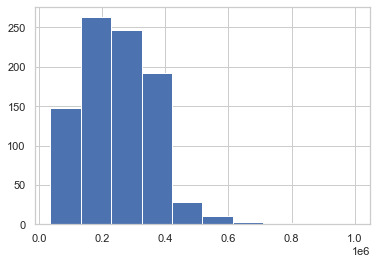

In [8]:
plt.hist(data['Salary'],bins=10)

Bar graph of salary levels categorized based on 12th board. and ci=None suppresses error bars

Students of icse board tend to earn higher salaries than the other two.

C:\Users\SNEGHAL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\SNEGHAL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, 'Salary vs 12Board')

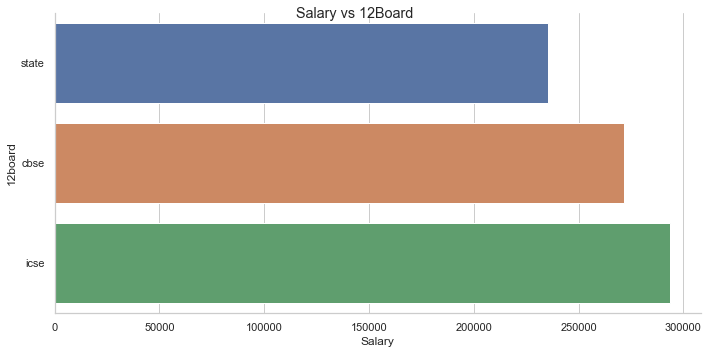

In [9]:
sns.factorplot(x='Salary', y='12board', kind='bar', data=data, ci=None , size=5,aspect=2)
plt.suptitle('Salary vs 12Board')

<AxesSubplot:xlabel='Logical', ylabel='Salary'>

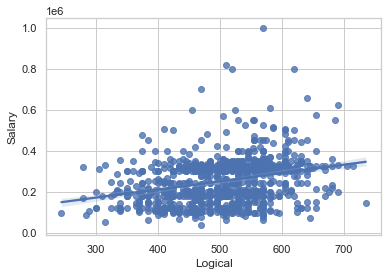

In [10]:
sns.regplot(x='Logical', y='Salary', data=data)

Creating new columns 

In [11]:
data['AverageScore']=(data['Logical']+data['Quant']+data['English'])/3
data['Acadperf']=data['10percentage']+data['12percentage']+data['collegeGPA']/3

Lpositive correlation between salary and average(logical+quant+english) score is indicated

<AxesSubplot:xlabel='AverageScore', ylabel='Salary'>

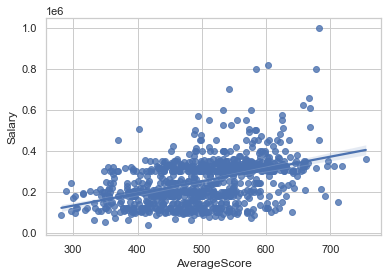

In [13]:
sns.regplot(x='AverageScore', y='Salary', data=data)

Plotting the correlation matrix of the dataset

<AxesSubplot:>

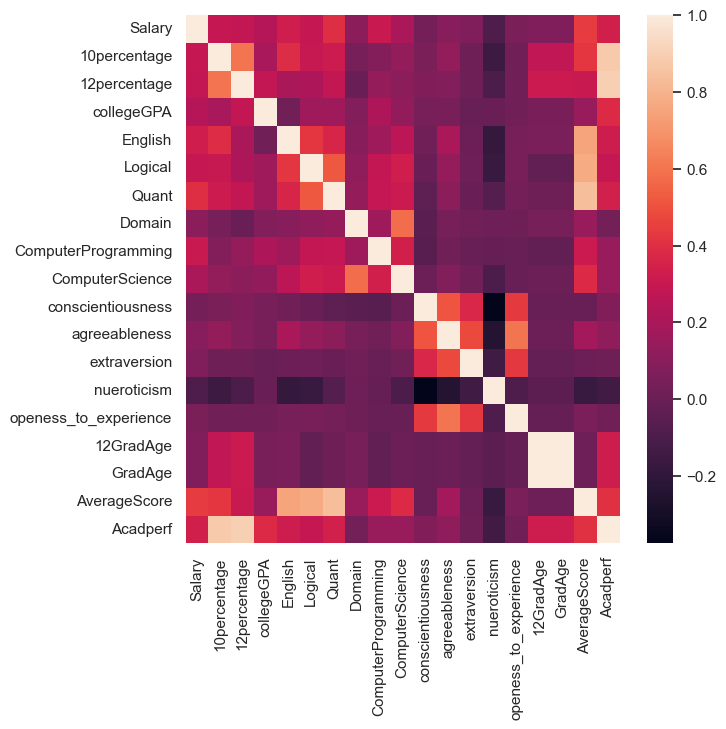

In [14]:
plt.figure(figsize= (7,7), dpi=100)
sns.heatmap(data.corr())

Positive correlation between salary and computer programming skills

<AxesSubplot:xlabel='ComputerProgramming', ylabel='Salary'>

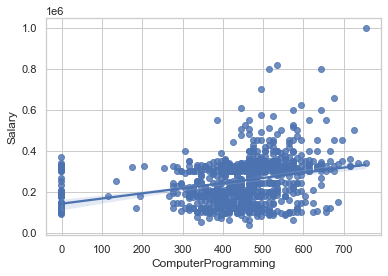

In [15]:
sns.regplot(x='ComputerProgramming', y='Salary', data=data)

Boxplot visualization of salary and specialization

It is observed that CS department has many outliers indicating higher salaries are earned by those of CS specializaton

The median salary of EC dept is higher than others.

Text(0.5, 0.98, 'Salary levels by specialization')

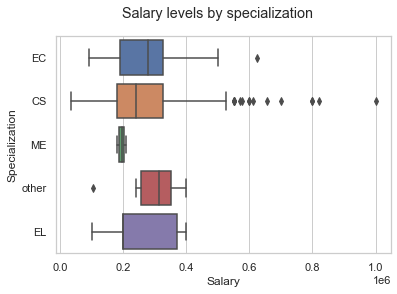

In [16]:
sns.boxplot(x='Salary', y = 'Specialization', data=data)
plt.suptitle('Salary levels by specialization')